<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Analogía de la mecánica respiratoria</font></b></h1>
        <h2><font color='0B5345'>Trabajo 1 2025-02</font></h2>
        <h3><font color='0B5345'>Allison J. Rojas, Jader S. Chingal, Johan S Rendon </font></h3>
    </div>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [8]:
# Parámetros de simulación

tm = 0.001   # intervalo de tiempo (s)
t_max = 20   # tiempo total de simulación (s)
time = np.arange(0, t_max + tm, tm)

# Conjuntos de parámetros bibliograficos reportados 
conjuntos = {
    'Sano': {'Rc': 1.0,  'Rp': 0.5,  'CL': 0.2,  'Cs': 0.005, 'Cw': 0.2},
    'condicion 1':    {'Rc': 1.84, 'Rp': 0.92,  'CL': 0.05,'Cs': 0.35,  'Cw': 0.06},
    'condicion 2':    {'Rc': 1.115,  'Rp': 3.17, 'CL': 0.2, 'Cs': 0.0015,  'Cw': 0.2},
}

# Función de entrada: Pao senoidal entrada via aerea 
def generar_Pao(f, t):
    # 2.5 por configuración de Pao (5 cmH2O pico a pico)
    return 2.5 * np.sin(2 * np.pi * f * t)


Listo. Imágenes guardadas: QA_f_0_2.png, QA_f_0_25.png y QA_f_0_33.png


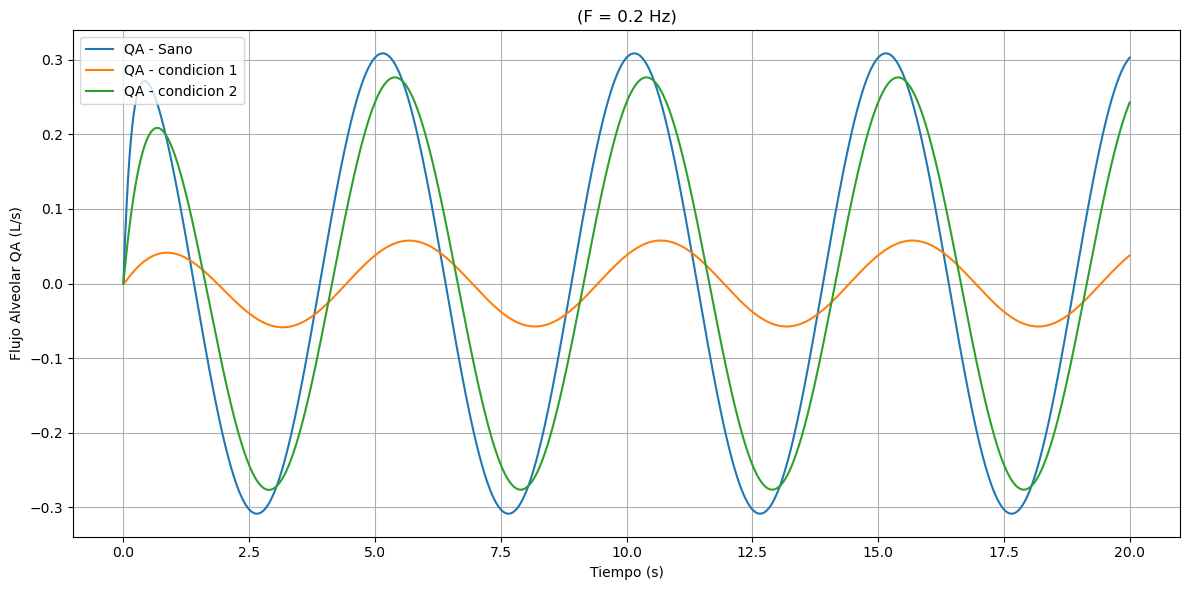

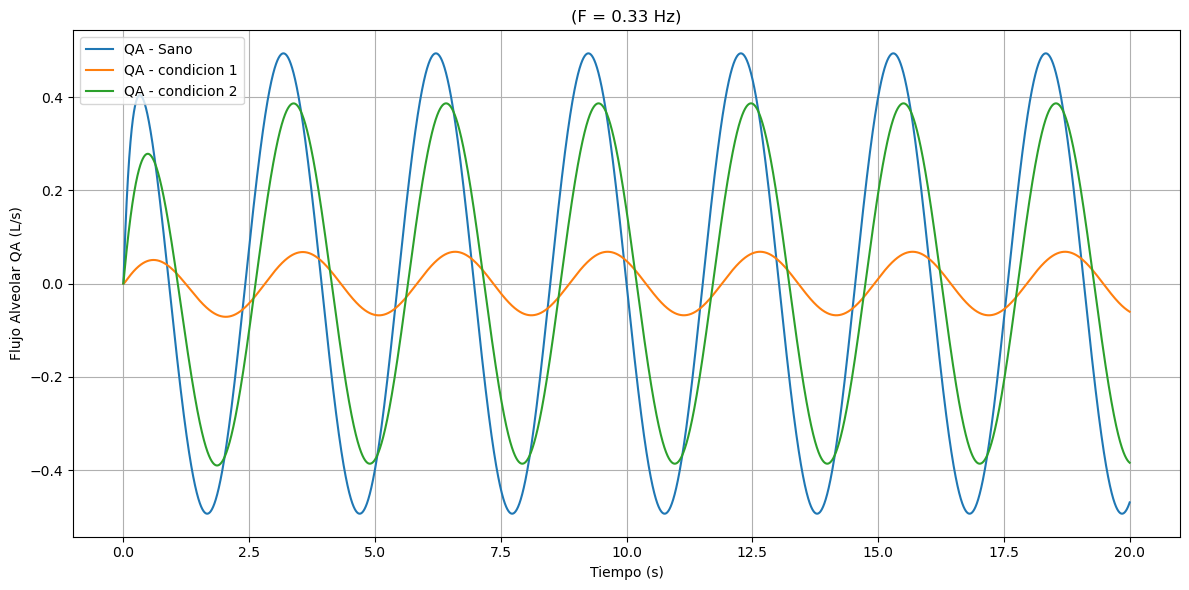

In [9]:
# Frecuencias sano, condion 1 y 2
frecuencias = [0.2, 0.33]

for f in frecuencias:
    plt.figure(figsize=(12, 6))

    for nombre, datos in conjuntos.items():
        Rc, Rp = datos['Rc'], datos['Rp']
        CL, Cs, Cw = datos['CL'], datos['Cs'], datos['Cw']

        # Coeficientes del denominador (a2*s^2 + a1*s + a0)
        a2 = Rp * Rc * Cs * CL * Cw
        a1 = (Rc * Cs * Cw + Rc * Cs * CL + Rp * Cs * Cw +
              Rc * CL * Cw + Rp * CL * Cw)
        a0 = CL + Cw

        # Numerador y denominador de la función de transferencia
        num = [CL * Cw, 0]
        den = [a2, a1, a0]

        # Crear sistema
        system = signal.TransferFunction(num, den)

        # Entrada senoidal a frecuencia f
        Pao = generar_Pao(f, time)

        # Respuesta del sistema
        t_out, QA_tf, _ = signal.lsim(system, Pao, T=time)

        # Graficar
        plt.plot(t_out, QA_tf, label=f"QA - {nombre}")

    # Estética y guardado
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Flujo Alveolar QA (L/s)")
    plt.title(f"(F = {f} Hz)")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show

    # Guarda cada figura como PNG en el directorio actual
    nombre_archivo = f"QA_f_{str(f).replace('.', '_')}.png"
    plt.savefig(nombre_archivo, dpi=200, bbox_inches="tight")
    #plt.close()
    

print("Listo. Imágenes guardadas: QA_f_0_2.png, QA_f_0_25.png y QA_f_0_33.png")